# <h1 align="center">TRABALHO MPPO </h1> 

<h3 align="right">Autores: Marcelle Cordeiro e Frederico Barroso</h3> 

# <h1 align="center">Apendice A: Refinamento dos dados </h1> 

In [1]:
import xlrd 
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np

In [2]:
dados = pd.read_excel("TABELA_INTERRUPCAO_NOVOS_CONJUNTOS_1T_2018.xlsx", sheet_name = 'Relatorio_Novos_Conjuntos_1T_20') 

In [3]:
dados.shape #O volume de dados é muito grande vamos precisar reduzir

(88424, 41)

In [4]:
dados.head()

,NUM_DOCUMENTO,NUM_ID_INTERRUPCAO,NUM_ID_ITEM,LOCALORIGEM,LOCAL,COD_CONJUNTO,COD_SIGLA,COD_CONJUNTO_ANEEL,DES_CONJUNTO,QTD_CONS,...,MIN_DURACAO,COD_PROPR_TRAFO,NUM_RELIGAM_CALCULADO,NUM_FREQUENCIA,CONS_TOTAL,COD_TIP_EXPURGO,DES_TIP_EXPURGO,COD_SIGLA_EXPURGO,CONS_CONJUNTO,DEST_DATETIME
0,60646994,2664119,1,565,551,18,5015,15015,RAMOS AEREO,17,...,0.00,NaN,NaN,1,0,0,SEM EXPURGO,NaN,0,20180612
1,60646994,2664119,2,565,565,18,5015,15015,RAMOS AEREO,1,...,0.00,NaN,NaN,1,0,0,SEM EXPURGO,NaN,0,20180612
2,60646994,2664117,1,550,551,18,5015,15015,RAMOS AEREO,1284,...,0.17,NaN,NaN,1,0,0,SEM EXPURGO,NaN,0,20180612
3,60646994,2664117,2,550,550,18,5015,15015,RAMOS AEREO,415,...,0.17,NaN,NaN,1,0,0,SEM EXPURGO,NaN,0,20180612
4,60657310,2663249,1,786,786,99,5087,15087,TRES RIOS AEREO AT/MT,101,...,44.00,P,NaN,1,0,0,SEM EXPURGO,NaN,0,20180612


In [5]:
dados.columns #vamos selecionar quais colunas serão mantidas para o trabalho

Index(['NUM_DOCUMENTO', 'NUM_ID_INTERRUPCAO', 'NUM_ID_ITEM', 'LOCALORIGEM',
       'LOCAL', 'COD_CONJUNTO', 'COD_SIGLA', 'COD_CONJUNTO_ANEEL',
       'DES_CONJUNTO', 'QTD_CONS', 'QTD_CONS_DIST', 'QTD_CONS_PRIM',
       'QTD_CONS_RUR', 'DAT_INICIO', 'INTERRUPCAO_INICIO',
       'INTERRUPCAO_TERMINO', 'GRUPO_CAUSA', 'CAUSA', 'COD_EQUIP_DANIF',
       'COD_TIP_COND_ATMOSF', 'COD_TIPO_TRECHO', 'COD_TIPO_REDE',
       'DES_LABEL_ALIMENT', 'COD_FASE_TRAFO', 'COD_POT_TRAFO',
       'COD_TIPO_DISP_OPER', 'COD_EQUIP_OPER', 'DES_LABEL_DISP_OPER',
       'TAG_FASE_A', 'TAG_FASE_B', 'TAG_FASE_C', 'MIN_DURACAO',
       'COD_PROPR_TRAFO', 'NUM_RELIGAM_CALCULADO', 'NUM_FREQUENCIA',
       'CONS_TOTAL', 'COD_TIP_EXPURGO', 'DES_TIP_EXPURGO', 'COD_SIGLA_EXPURGO',
       'CONS_CONJUNTO', 'DEST_DATETIME'],
      dtype='object')

In [6]:
descricao_das_colunas= pd.read_excel("TABELA_INTERRUPCAO_NOVOS_CONJUNTOS_1T_2018.xlsx", sheet_name = 'DESCRICAO') 

In [7]:
descricao_das_colunas.shape

(41, 5)

In [8]:
descricao_das_colunas.head(41) #vamos selecionar quais colunas serão mantidas para o trabalho

,CAMPO,DESCRIÇÃO,Unnamed: 2,Unnamed: 3,Desconsiderar
0,NUM_DOCUMENTO,ID da ordem / documento,NaN,NaN,NaN
1,NUM_ID_INTERRUPCAO,ID da interrupção,NaN,NaN,NaN
2,NUM_ID_ITEM,ID do item da interrupção,NaN,NaN,NaN
3,LOCALORIGEM,Local da origem da falha para calcular indicad...,NaN,NaN,NaN
4,LOCAL,Local impactado,NaN,NaN,NaN
5,COD_CONJUNTO,Código de conjunto,NaN,NaN,NaN
6,COD_SIGLA,Código de conjunto,NaN,NaN,NaN
7,COD_CONJUNTO_ANEEL,Código de conjunto,NaN,NaN,NaN
8,DES_CONJUNTO,Nome do conjunto aneel,NaN,NaN,NaN
9,QTD_CONS,Total de consumidores interrompidos (CI),NaN,NaN,NaN


In [9]:
#Usado para excluir colunas inteiras que não seriam úteis para o objetivo do trabalho

dados.drop(['NUM_ID_INTERRUPCAO','NUM_ID_ITEM', 'LOCALORIGEM','LOCAL', 'COD_CONJUNTO',
            'COD_SIGLA', 'COD_CONJUNTO_ANEEL', 'QTD_CONS_DIST', 'QTD_CONS_PRIM','QTD_CONS_RUR','GRUPO_CAUSA',
            'CAUSA', 'COD_EQUIP_DANIF','COD_TIP_COND_ATMOSF', 'COD_TIPO_TRECHO', 'COD_TIPO_REDE',
            'DES_LABEL_ALIMENT', 'COD_FASE_TRAFO', 'COD_POT_TRAFO','COD_TIPO_DISP_OPER', 'COD_EQUIP_OPER', 
            'DES_LABEL_DISP_OPER', 'TAG_FASE_A', 'TAG_FASE_B', 'TAG_FASE_C', 'MIN_DURACAO',
            'COD_PROPR_TRAFO', 'NUM_RELIGAM_CALCULADO', 'NUM_FREQUENCIA','CONS_TOTAL','COD_TIP_EXPURGO', 
            'COD_SIGLA_EXPURGO','CONS_CONJUNTO', 'DEST_DATETIME'], axis=1, inplace = True)

In [10]:
dados.shape #Reduziu de 41 colunas para 6

(88424, 7)

In [11]:
dados.head()

,NUM_DOCUMENTO,DES_CONJUNTO,QTD_CONS,DAT_INICIO,INTERRUPCAO_INICIO,INTERRUPCAO_TERMINO,DES_TIP_EXPURGO
0,60646994,RAMOS AEREO,17,2018-04-02,2018-04-02 00:20:00,2018-04-02 00:20:00,SEM EXPURGO
1,60646994,RAMOS AEREO,1,2018-04-02,2018-04-02 00:20:00,2018-04-02 00:20:00,SEM EXPURGO
2,60646994,RAMOS AEREO,1284,2018-04-01,2018-04-01 20:27:50,2018-04-01 20:28:00,SEM EXPURGO
3,60646994,RAMOS AEREO,415,2018-04-01,2018-04-01 20:27:50,2018-04-01 20:28:00,SEM EXPURGO
4,60657310,TRES RIOS AEREO AT/MT,101,2018-04-01,2018-04-01 00:06:00,2018-04-01 00:50:00,SEM EXPURGO


In [12]:
# O volume de dados ainda está muito grande, 88424 linhas, vamos usar uma segunda tabela para filtrar apenas os códigos 
#referentes a região Oeste, contudo a coluna dos códigos nessa segunda tabela recebe o nome de numserv, vamos precisar 
#alterar o nome da nossa tabela dados, para as colunas nas duas tabelas ficarem com mesmo nome

dados = dados.rename({'NUM_DOCUMENTO':'numserv'}, axis=1)

In [13]:
dados.head()

,numserv,DES_CONJUNTO,QTD_CONS,DAT_INICIO,INTERRUPCAO_INICIO,INTERRUPCAO_TERMINO,DES_TIP_EXPURGO
0,60646994,RAMOS AEREO,17,2018-04-02,2018-04-02 00:20:00,2018-04-02 00:20:00,SEM EXPURGO
1,60646994,RAMOS AEREO,1,2018-04-02,2018-04-02 00:20:00,2018-04-02 00:20:00,SEM EXPURGO
2,60646994,RAMOS AEREO,1284,2018-04-01,2018-04-01 20:27:50,2018-04-01 20:28:00,SEM EXPURGO
3,60646994,RAMOS AEREO,415,2018-04-01,2018-04-01 20:27:50,2018-04-01 20:28:00,SEM EXPURGO
4,60657310,TRES RIOS AEREO AT/MT,101,2018-04-01,2018-04-01 00:06:00,2018-04-01 00:50:00,SEM EXPURGO


In [14]:
codigos_da_região_oeste = pd.read_excel("ORDENS_DSO.xlsx",sheet_name = 'Plan1')

In [15]:
lista = codigos_da_região_oeste.values.tolist()
selecao = []
for x in range(len(lista)):
    selecao.append(lista[x][0])

In [16]:
dados_oeste = dados[dados['numserv'].isin(selecao)]

In [17]:
dados_oeste.shape #tinhamos 88424 linhas, com o filtro da região Oeste, caíram para 21892 linhas

(21892, 7)

In [18]:
#Usados para contabilizar apenas as ocorrências que não poderiam ser expurgadas dos indicadores de eficiência das 
#distribuidoras de energia elétrica. Tais ocorrências são utilizadas na avaliação do nível de serviço prestado

dados_oeste = dados_oeste.loc[dados_oeste['DES_TIP_EXPURGO']==("SEM EXPURGO")]

In [19]:
dados_oeste.shape 

(14632, 7)

In [20]:
dados_oeste.dtypes #para saber se as colunas de datas estavam com o formato datetime

numserv                         int64
DES_CONJUNTO                   object
QTD_CONS                        int64
DAT_INICIO             datetime64[ns]
INTERRUPCAO_INICIO     datetime64[ns]
INTERRUPCAO_TERMINO    datetime64[ns]
DES_TIP_EXPURGO                object
dtype: object

In [21]:
#Vamos trabalhar apenas com os dados referentes ao mês de março nesse trabalho

dados_oeste_marco=dados_oeste.loc[dados_oeste.DAT_INICIO.dt.month == 3,:]

In [22]:
dados_oeste_marco.shape

(4906, 7)

In [23]:
dados_oeste_marco.head()

,numserv,DES_CONJUNTO,QTD_CONS,DAT_INICIO,INTERRUPCAO_INICIO,INTERRUPCAO_TERMINO,DES_TIP_EXPURGO
9,60657283,ARI FRANCO,116,2018-03-31,2018-03-31 23:48:00,2018-04-01 04:12:42,SEM EXPURGO
12,60657225,ESPERANCA AEREO MT/MT,76,2018-03-31,2018-03-31 23:19:00,2018-03-31 23:55:00,SEM EXPURGO
13,60657304,MATO ALTO,48,2018-03-31,2018-03-31 23:17:00,2018-04-01 01:30:00,SEM EXPURGO
19,60657444,CURICICA AEREO,1,2018-03-31,2018-03-31 23:02:54,2018-04-01 13:00:36,SEM EXPURGO
25,60657123,BRISA MAR,1,2018-03-31,2018-03-31 22:55:29,2018-04-01 00:50:00,SEM EXPURGO


In [24]:
#as colunas numserv e DES_TIP_EXPURGO já não serão mais úteis e podem ser eliminadas

dados_oeste_marco.drop(['numserv','DES_TIP_EXPURGO'], axis=1, inplace = True)

C:\Users\marce\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
dados_oeste_marco.head()

,DES_CONJUNTO,QTD_CONS,DAT_INICIO,INTERRUPCAO_INICIO,INTERRUPCAO_TERMINO
9,ARI FRANCO,116,2018-03-31,2018-03-31 23:48:00,2018-04-01 04:12:42
12,ESPERANCA AEREO MT/MT,76,2018-03-31,2018-03-31 23:19:00,2018-03-31 23:55:00
13,MATO ALTO,48,2018-03-31,2018-03-31 23:17:00,2018-04-01 01:30:00
19,CURICICA AEREO,1,2018-03-31,2018-03-31 23:02:54,2018-04-01 13:00:36
25,BRISA MAR,1,2018-03-31,2018-03-31 22:55:29,2018-04-01 00:50:00


In [33]:
#Tabela contendo os conjuntos que possuem meta de DEC e a respectiva meta

TABELA_METAS_DEC_FEC_CONJUNTO = pd.read_excel("TABELA_METAS_DEC_FEC_CONJUNTO.xlsx",sheet_name = 'Metas_DEC-FEC')

In [34]:
TABELA_METAS_DEC_FEC_CONJUNTO.head()

,Conjunto de Consumidores,Ano,DEC Meta Mensal,DEC Meta Trimestral,DEC Meta Anual,FEC Meta Mensal,FEC Meta Trimestral,FEC Meta Anual
0,AGUA GRANDE AEREO,2011,2.5,4.8,8,2.0,3.6,6
1,ALDEIA CAMPISTA,2011,2.5,2.4,4,2.0,1.2,2
2,ALVORADA,2011,2.5,2.4,4,2.0,2.4,4
3,AREIA BRANCA AEREO,2011,2.7,5.4,9,2.4,4.8,8
4,ARI FRANCO,2011,3.0,6.0,10,2.7,5.4,9


In [39]:
#vamos manter apenas metas de DEC referentes a 2018

TABELA_METAS_DEC_FEC_CONJUNTO = TABELA_METAS_DEC_FEC_CONJUNTO.loc[TABELA_METAS_DEC_FEC_CONJUNTO["Ano"]==2018,:]

In [40]:
TABELA_METAS_DEC_FEC_CONJUNTO.head()

,Conjunto de Consumidores,Ano,DEC Meta Mensal,DEC Meta Trimestral,DEC Meta Anual,FEC Meta Mensal,FEC Meta Trimestral,FEC Meta Anual
734,AGUA GRANDE AEREO,2018,2.5,4.8,8,2.0,3.0,5
735,ALDEIA CAMPISTA,2018,2.5,2.4,4,2.0,1.2,2
736,ALVORADA,2018,2.5,2.4,4,2.0,2.4,4
737,AREIA BRANCA AEREO,2018,2.7,5.4,9,2.0,3.0,5
738,ARI FRANCO,2018,2.7,5.4,9,2.1,4.2,7


In [42]:
#alterar o nome da coluna Conjunto de Consumidores da TABELA_METAS_DEC_FEC_CONJUNTO para que fique com o nome igual a respectiva coluna na tabela dados_oeste_marco 
TABELA_METAS_DEC_FEC_CONJUNTO = TABELA_METAS_DEC_FEC_CONJUNTO.rename({'Conjunto de Consumidores':'DES_CONJUNTO'}, axis=1)


In [69]:
TABELA_METAS_DEC_FEC_CONJUNTO.head()

,DES_CONJUNTO,Ano,DEC Meta Mensal,DEC Meta Trimestral,DEC Meta Anual,FEC Meta Mensal,FEC Meta Trimestral,FEC Meta Anual
734,AGUA GRANDE AEREO,2018,2.5,4.8,8,2.0,3.0,5
735,ALDEIA CAMPISTA,2018,2.5,2.4,4,2.0,1.2,2
736,ALVORADA,2018,2.5,2.4,4,2.0,2.4,4
737,AREIA BRANCA AEREO,2018,2.7,5.4,9,2.0,3.0,5
738,ARI FRANCO,2018,2.7,5.4,9,2.1,4.2,7


In [73]:
lista = TABELA_METAS_DEC_FEC_CONJUNTO.values.tolist()
selecao = []
for x in range(len(lista)):
    selecao.append(lista[x][0]) #esse [0] já está dizendo para usar a primeira coluna

In [106]:
#dados da região oeste, do mês de março e que possuem meta de DEC

dados_oeste_marco_DEC = dados_oeste_marco[dados_oeste_marco['DES_CONJUNTO'].isin(selecao)]

In [107]:
dados_oeste_marco_DEC.shape

(4186, 5)

In [108]:
dados_oeste_marco.shape

(4906, 5)

In [109]:
#o volume de dados ainda está muito grande, vamos selecionar apenas um dos conjuntos que integram a região Oeste

dados_oeste_marco['DES_CONJUNTO'].unique()

array(['ARI FRANCO', 'ESPERANCA AEREO MT/MT', 'MATO ALTO',
       'CURICICA AEREO', 'BRISA MAR', 'PORTA DAGUA AEREO',
       'VILA VALQUEIRE', 'SANTISSIMO AEREO', 'ESPERANCA AEREO AT/MT ',
       'SEROPEDICA AEREO', 'CACHAMORRA', 'ITAGUAI  ', 'JABOATAO AEREO',
       'CAMARA', 'TAQUARA AEREO', 'BARRA AEREO', 'COSMOS', 'ALVORADA',
       'PADRE MIGUEL', 'ROSALI', 'CASCADURA AEREO', 'ZONA INDUSTRIAL ',
       'FREI CANECA AEREO', 'BOCA DO MATO AEREO', 'GUADALUPE AEREO',
       'JARDIM BOTANICO AEREO', 'MERITI', 'VIGARIO'], dtype=object)

In [110]:
dados_oeste_marco_DEC['DES_CONJUNTO'].unique()

array(['ARI FRANCO', 'ESPERANCA AEREO MT/MT', 'MATO ALTO',
       'CURICICA AEREO', 'BRISA MAR', 'PORTA DAGUA AEREO',
       'VILA VALQUEIRE', 'SANTISSIMO AEREO', 'SEROPEDICA AEREO',
       'CACHAMORRA', 'JABOATAO AEREO', 'CAMARA', 'TAQUARA AEREO',
       'BARRA AEREO', 'COSMOS', 'ALVORADA', 'PADRE MIGUEL', 'ROSALI',
       'CASCADURA AEREO', 'FREI CANECA AEREO', 'BOCA DO MATO AEREO',
       'GUADALUPE AEREO', 'JARDIM BOTANICO AEREO', 'MERITI', 'VIGARIO'],
      dtype=object)

In [111]:
#Quantas vezes cada conjunto aparece

num_de_chamados_por_conjunto = dados_oeste_marco_DEC['DES_CONJUNTO'].value_counts()

In [100]:
print()

PORTA DAGUA AEREO        406
COSMOS                   322
CURICICA AEREO           320
CAMARA                   316
ARI FRANCO               307
SEROPEDICA AEREO         275
JABOATAO AEREO           273
MATO ALTO                271
CACHAMORRA               262
PADRE MIGUEL             254
BRISA MAR                244
TAQUARA AEREO            227
ESPERANCA AEREO MT/MT    224
SANTISSIMO AEREO         222
VILA VALQUEIRE           107
BARRA AEREO               70
CASCADURA AEREO           38
GUADALUPE AEREO           21
FREI CANECA AEREO          8
JARDIM BOTANICO AEREO      6
BOCA DO MATO AEREO         4
ALVORADA                   4
MERITI                     2
ROSALI                     2
VIGARIO                    1
Name: DES_CONJUNTO, dtype: int64


In [103]:
#vamos exportar apenas para montar o gráfico

writer = pd.ExcelWriter(r'C:\Users\marce\Desktop\Artigo\POMS\num_de_chamados_por_conjunto.xlsx')
num_de_chamados_por_conjunto.to_excel(writer,'num_de_chamados_por_conjunto')
writer.save()

In [112]:
# Vamos selecionar apenas os dados de um dos conjuntos. O conjunto Ari Franco foi escolhido por dispor de metas de DEC 
#e um alto volume de ocorrências

dados_Ari_Franco_marco = dados_oeste_marco_DEC.loc[dados_oeste_marco_DEC['DES_CONJUNTO']==("ARI FRANCO")]

In [113]:
dados_Ari_Franco_marco.shape

(307, 5)

In [114]:
dados_Ari_Franco_marco.head()

,DES_CONJUNTO,QTD_CONS,DAT_INICIO,INTERRUPCAO_INICIO,INTERRUPCAO_TERMINO
9,ARI FRANCO,116,2018-03-31,2018-03-31 23:48:00,2018-04-01 04:12:42
150,ARI FRANCO,54,2018-03-31,2018-03-31 16:57:00,2018-03-31 22:14:08
227,ARI FRANCO,1,2018-03-31,2018-03-31 13:31:32,2018-04-01 12:25:00
233,ARI FRANCO,1,2018-03-31,2018-03-31 13:21:00,2018-03-31 13:50:00
247,ARI FRANCO,1,2018-03-31,2018-03-31 12:38:26,2018-03-31 18:35:00


In [123]:
#Aqui se encerra a etapa de refinamento de dados

writer = pd.ExcelWriter(r'C:\Users\marce\Desktop\Artigo\POMS\MPPO_dados_refinados.xlsx')
dados_Ari_Franco_marco.to_excel(writer,'dados refinados')
writer.save()

<h1 align="center">Apendice B: Cálculo dos parâmetros para teoria de filas </h1> 

In [124]:
import xlrd 
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np

In [125]:
#vamos começar lendo o arquivo gerado na etapa anterior, já coloquei no jupyter para facilitar a leitura

dados = pd.read_excel("MPPO_dados_refinados.xlsx", sheet_name = 'dados refinados')

In [126]:
#vamos converter o arquivo para csv para que a leitura fique ainda mais rápida. 

dados.to_csv('MPPO_dados_refinados.csv')

In [127]:
dados.shape

(307, 5)

In [128]:
dados.head()

,DES_CONJUNTO,QTD_CONS,DAT_INICIO,INTERRUPCAO_INICIO,INTERRUPCAO_TERMINO
9,ARI FRANCO,116,2018-03-31,2018-03-31 23:48:00,2018-04-01 04:12:42
150,ARI FRANCO,54,2018-03-31,2018-03-31 16:57:00,2018-03-31 22:14:08
227,ARI FRANCO,1,2018-03-31,2018-03-31 13:31:32,2018-04-01 12:25:00
233,ARI FRANCO,1,2018-03-31,2018-03-31 13:21:00,2018-03-31 13:50:00
247,ARI FRANCO,1,2018-03-31,2018-03-31 12:38:26,2018-03-31 18:35:00


In [129]:
#vamos precisar de uma nova coluna com a duração do serviço de reparo de emergência

dados["DURACAO_SERVICO"] = dados['INTERRUPCAO_TERMINO'] - dados['INTERRUPCAO_INICIO']

In [130]:
dados.head()

,DES_CONJUNTO,QTD_CONS,DAT_INICIO,INTERRUPCAO_INICIO,INTERRUPCAO_TERMINO,DURACAO_SERVICO
9,ARI FRANCO,116,2018-03-31,2018-03-31 23:48:00,2018-04-01 04:12:42,04:24:42
150,ARI FRANCO,54,2018-03-31,2018-03-31 16:57:00,2018-03-31 22:14:08,05:17:08
227,ARI FRANCO,1,2018-03-31,2018-03-31 13:31:32,2018-04-01 12:25:00,22:53:28
233,ARI FRANCO,1,2018-03-31,2018-03-31 13:21:00,2018-03-31 13:50:00,00:29:00
247,ARI FRANCO,1,2018-03-31,2018-03-31 12:38:26,2018-03-31 18:35:00,05:56:34


In [131]:
dados.dtypes

DES_CONJUNTO                    object
QTD_CONS                         int64
DAT_INICIO              datetime64[ns]
INTERRUPCAO_INICIO      datetime64[ns]
INTERRUPCAO_TERMINO     datetime64[ns]
DURACAO_SERVICO        timedelta64[ns]
dtype: object

In [132]:
import datetime

In [133]:
#vamos analisar um pouco mais o comportamento dos dados de duração de serviço, porém no formato timedelta não conseguiremos
#plotar os gráficos, então vamos trabalhar com os dados em minutos
#Referência: https://stackoverflow.com/questions/26456825/convert-timedelta64ns-column-to-seconds-in-python-pandas-dataframe

dados['DURACAO_SERVICO_min'] = dados['DURACAO_SERVICO'].astype('timedelta64[m]')

In [134]:
dados.head()

,DES_CONJUNTO,QTD_CONS,DAT_INICIO,INTERRUPCAO_INICIO,INTERRUPCAO_TERMINO,DURACAO_SERVICO,DURACAO_SERVICO_min
9,ARI FRANCO,116,2018-03-31,2018-03-31 23:48:00,2018-04-01 04:12:42,04:24:42,264.0
150,ARI FRANCO,54,2018-03-31,2018-03-31 16:57:00,2018-03-31 22:14:08,05:17:08,317.0
227,ARI FRANCO,1,2018-03-31,2018-03-31 13:31:32,2018-04-01 12:25:00,22:53:28,1373.0
233,ARI FRANCO,1,2018-03-31,2018-03-31 13:21:00,2018-03-31 13:50:00,00:29:00,29.0
247,ARI FRANCO,1,2018-03-31,2018-03-31 12:38:26,2018-03-31 18:35:00,05:56:34,356.0


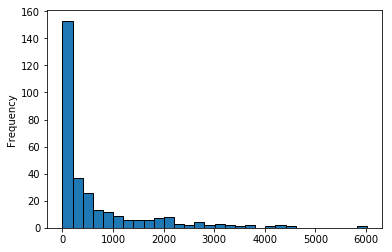

In [135]:
dados["DURACAO_SERVICO_min"].plot.hist(bins=30, edgecolor='black')

In [136]:
dados.shape

(307, 7)

C:\Users\marce\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


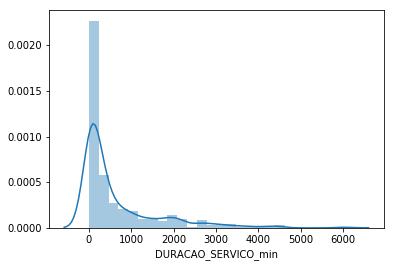

In [145]:
# Vamos verificar quais dados podem ser excluídos

import seaborn as sns

sns.distplot(dados["DURACAO_SERVICO_min"])

C:\Users\marce\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


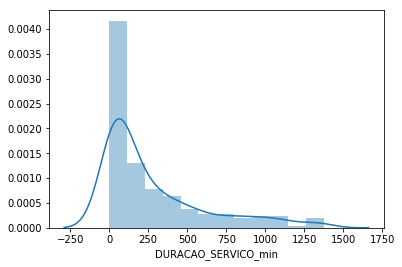

In [142]:
#teste estatístico para exclusão de outliers

q1 = float(dados["DURACAO_SERVICO_min"].quantile([0.25]))
q3 = float(dados["DURACAO_SERVICO_min"].quantile([0.75]))

med = dados["DURACAO_SERVICO_min"].median()

xmin = med - 1.5*(q3-q1)
xmax = med + 1.5*(q3-q1)

clean = dados[(dados["DURACAO_SERVICO_min"]>=xmin)&(dados["DURACAO_SERVICO_min"]<=xmax)]

sns.distplot(clean["DURACAO_SERVICO_min"])

In [143]:
print("mínimo é", xmin, "e", "máximo é", xmax)

mínimo é -967.25 e máximo é 1377.25


In [146]:
print ("q1", q1, "e", "q3", q3)

q1 48.0 e q3 829.5


In [147]:
print ("mediana", med)

mediana 205.0


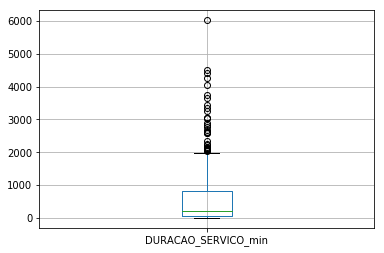

In [148]:
boxplot = dados.boxplot(column=['DURACAO_SERVICO_min'])

In [149]:
clean.shape

(256, 7)

In [150]:
clean.describe()

,QTD_CONS,DURACAO_SERVICO,DURACAO_SERVICO_min
count,256.000000,256,256.000000
mean,215.929688,0 days 04:36:29.117187,276.234375
std,598.605251,0 days 05:35:51.672016,335.819372
min,1.000000,0 days 00:00:00,0.000000
25%,1.000000,0 days 00:35:00,35.000000
50%,15.000000,0 days 02:05:27.500000,125.000000
75%,90.250000,0 days 06:46:44,406.250000
max,3519.000000,0 days 22:53:28,1373.000000


In [151]:
import numpy as np

In [152]:
x = np.sort (clean["DURACAO_SERVICO_min"])

In [153]:
y = np.arange (1, len(x) + 1)/len(x)

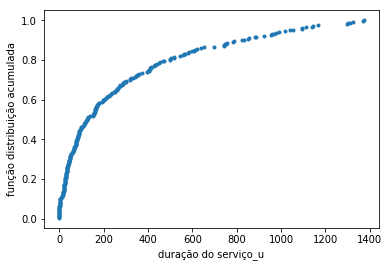

In [154]:
_ = plt.xlabel ('duração do serviço_u')
_ = plt.ylabel ('função distribuição acumulada')
_ = plt.plot (x,y, marker = '.', linestyle = 'none')

In [155]:
#precisamos do tempo de duração do serviço médio, para calcular a taxa de serviços que 
#será usada na teoria de filas

tempo_medio_serviço = clean ['DURACAO_SERVICO_min'].mean()

print (tempo_medio_serviço)

276.234375


In [156]:
#A taxa u é um sobre o tempo medio de duração de serviço.

u = 1/(tempo_medio_serviço)

print (u)

0.003620114259856327


In [157]:
clean.head()

,DES_CONJUNTO,QTD_CONS,DAT_INICIO,INTERRUPCAO_INICIO,INTERRUPCAO_TERMINO,DURACAO_SERVICO,DURACAO_SERVICO_min
9,ARI FRANCO,116,2018-03-31,2018-03-31 23:48:00,2018-04-01 04:12:42,04:24:42,264.0
150,ARI FRANCO,54,2018-03-31,2018-03-31 16:57:00,2018-03-31 22:14:08,05:17:08,317.0
227,ARI FRANCO,1,2018-03-31,2018-03-31 13:31:32,2018-04-01 12:25:00,22:53:28,1373.0
233,ARI FRANCO,1,2018-03-31,2018-03-31 13:21:00,2018-03-31 13:50:00,00:29:00,29.0
247,ARI FRANCO,1,2018-03-31,2018-03-31 12:38:26,2018-03-31 18:35:00,05:56:34,356.0


In [158]:
#precisamos reorganizar o dataframe em ordem crescente de tempo do início das chegadas, 
#para calcular o intervalo entre as chegadas

dados = clean.sort_values(['INTERRUPCAO_INICIO'])

In [159]:
dados.head()

,DES_CONJUNTO,QTD_CONS,DAT_INICIO,INTERRUPCAO_INICIO,INTERRUPCAO_TERMINO,DURACAO_SERVICO,DURACAO_SERVICO_min
25727,ARI FRANCO,1,2018-03-01,2018-03-01 05:00:00,2018-03-01 05:12:00,00:12:00,12.0
25549,ARI FRANCO,1,2018-03-01,2018-03-01 09:59:18,2018-03-01 13:51:02,03:51:44,231.0
25494,ARI FRANCO,21,2018-03-01,2018-03-01 11:01:00,2018-03-01 11:45:00,00:44:00,44.0
25483,ARI FRANCO,1,2018-03-01,2018-03-01 11:10:00,2018-03-01 11:20:00,00:10:00,10.0
25453,ARI FRANCO,1,2018-03-01,2018-03-01 11:37:00,2018-03-01 17:35:00,05:58:00,358.0


In [160]:
#os índices ficaram bagunçados, pois reordenamos o dataframe com base em uma coluna e os 
#índices se mantiveram iguais a organização anterior. Vamos rearruma-los.

dados = dados.reset_index(drop=True)

In [161]:
dados.head()

,DES_CONJUNTO,QTD_CONS,DAT_INICIO,INTERRUPCAO_INICIO,INTERRUPCAO_TERMINO,DURACAO_SERVICO,DURACAO_SERVICO_min
0,ARI FRANCO,1,2018-03-01,2018-03-01 05:00:00,2018-03-01 05:12:00,00:12:00,12.0
1,ARI FRANCO,1,2018-03-01,2018-03-01 09:59:18,2018-03-01 13:51:02,03:51:44,231.0
2,ARI FRANCO,21,2018-03-01,2018-03-01 11:01:00,2018-03-01 11:45:00,00:44:00,44.0
3,ARI FRANCO,1,2018-03-01,2018-03-01 11:10:00,2018-03-01 11:20:00,00:10:00,10.0
4,ARI FRANCO,1,2018-03-01,2018-03-01 11:37:00,2018-03-01 17:35:00,05:58:00,358.0


In [162]:
dados.shape

(256, 7)

In [165]:
writer = pd.ExcelWriter(r'C:\Users\marce\Desktop\Artigo\POMS\intervalo_entre_chamados_Ari_Franco.xlsx')
dados.to_excel(writer,'intervalo_entre_chamados')
writer.save()

In [185]:
#vamos importar o intervalo entre os chamados

intervalo_entre_chamados_Ari_Franco = pd.read_excel("intervalo_entre_chamados_Ari_Franco.xlsx", sheet_name = 'intervalo_entre_chamados') 

In [186]:
intervalo_entre_chamados_Ari_Franco.head()

,intervalo_entre_chamados_Ari_Franco
0,299.300000
1,61.700000
2,9.000000
3,27.000000
4,124.483333


In [187]:
intervalo_entre_chamados_Ari_Franco = intervalo_entre_chamados_Ari_Franco.sort_values(['intervalo_entre_chamados_Ari_Franco'])

In [191]:
intervalo_entre_chamados_Ari_Franco.head(20)

,intervalo_entre_chamados_Ari_Franco
231,0.0
230,0.0
174,0.0
154,0.0
158,0.0
50,0.0
242,0.0
244,0.0
165,0.0
26,0.0


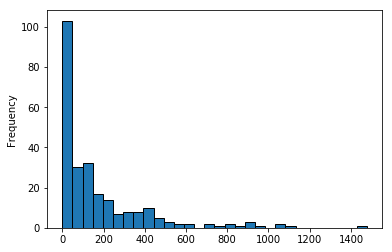

In [189]:
intervalo_entre_chamados_Ari_Franco["intervalo_entre_chamados_Ari_Franco"].plot.hist(bins=30, edgecolor='black')

C:\Users\marce\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


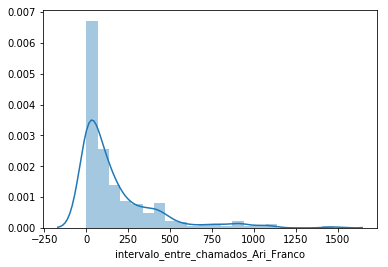

In [190]:
# Vamos verificar quais dados podem ser excluídos

import seaborn as sns

sns.distplot(intervalo_entre_chamados_Ari_Franco["intervalo_entre_chamados_Ari_Franco"])

C:\Users\marce\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


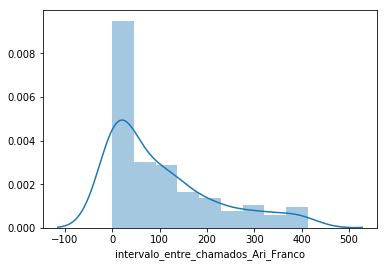

In [194]:
#teste estatístico para exclusão de outliers

q1 = float(intervalo_entre_chamados_Ari_Franco["intervalo_entre_chamados_Ari_Franco"].quantile([0.25]))
q3 = float(intervalo_entre_chamados_Ari_Franco["intervalo_entre_chamados_Ari_Franco"].quantile([0.75]))

med = intervalo_entre_chamados_Ari_Franco["intervalo_entre_chamados_Ari_Franco"].median()

xmin = med - 1.5*(q3-q1)
xmax = med + 1.5*(q3-q1)

Intervalo_entre_chamados_sem_outliers_Ari_Franco = intervalo_entre_chamados_Ari_Franco[(intervalo_entre_chamados_Ari_Franco["intervalo_entre_chamados_Ari_Franco"]>=xmin)&(intervalo_entre_chamados_Ari_Franco["intervalo_entre_chamados_Ari_Franco"]<=xmax)]

sns.distplot(Intervalo_entre_chamados_sem_outliers_Ari_Franco["intervalo_entre_chamados_Ari_Franco"])

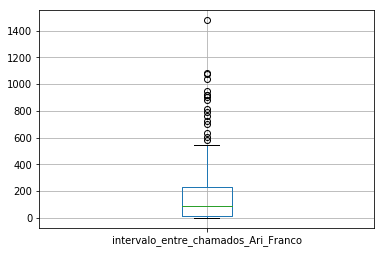

In [197]:
boxplot2 = intervalo_entre_chamados_Ari_Franco.boxplot(column=['intervalo_entre_chamados_Ari_Franco'])

In [198]:
duracao_servico_sem_outliers.shape

(225, 1)

In [199]:
duracao_servico_sem_outliers.describe()

,intervalo_entre_chamados_Ari_Franco
count,225.000000
mean,103.865481
std,113.224946
min,0.000000
25%,9.000000
50%,61.700000
75%,153.000000
max,413.000000


In [200]:
tempo_medio_entre_chegadas = duracao_servico_sem_outliers["intervalo_entre_chamados_Ari_Franco"].mean()

print (tempo_medio_entre_chegadas)

103.86548148128205


In [201]:
lambdaa = 1/tempo_medio_entre_chegadas

print (lambdaa)

0.009627837716038638


In [202]:
print (u)

0.003620114259856327


In [203]:
import numpy as np

In [204]:
import matplotlib.pyplot as plt

In [205]:
x = np.sort (duracao_servico_sem_outliers["intervalo_entre_chamados_Ari_Franco"])

In [206]:
y = np.arange (1, len(x) + 1)/len(x)

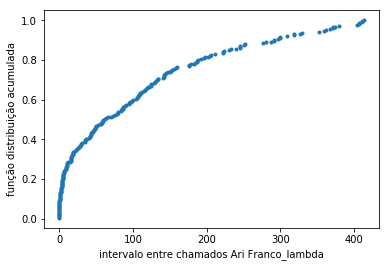

In [207]:
_ = plt.xlabel ('intervalo entre chamados Ari Franco_lambda')
_ = plt.ylabel ('função distribuição acumulada')
_ = plt.plot (x,y, marker = '.', linestyle = 'none')

## <center> Teoria de filas <center>

In [208]:
#lambda > u, logo vamos precisar de mais de 1 servidor, modelo M/M/C. Vamos resgatar os parâmetros 
#já calculados

print("lambdaa é", lambdaa)

print("u é", u)

lambdaa é 0.009627837716038638
u é 0.003620114259856327


In [209]:
#o rou, fator de utilização, deve ser menor que 1, caso contrário a fila será infinita e todos os
#servidores estarão sempre ocupadas. Vamos supor que seja exatamente igual a 1

c = lambdaa/u

print (c)

2.6595397340913607


In [287]:
import math

c = math.ceil (c)

print(c)

3


In [288]:
# vamos precisar de no mínimo 3 servidores para que o sistema seja estável, vamos calcular os parâmetros da teoria de filas para 3 servidores e ve se atendem ao DEC do conjunto

rou = lambdaa/(c*u)

print("o fator de utiliação para três servidores é", rou)


o fator de utiliação para três servidores é 0.8865132446971202


In [289]:
#calculo do termo 1 da formula do po

somar_até = c - 1 
soma = 0
i=0
while i <= somar_até:
        termo = (math.pow ((lambdaa/u),i))/math.factorial(i)
        soma = soma + termo
        i=i+1
print (soma)

7.196115532696734


In [291]:
#calculo do termo 2 da fórmula do po 

#https://www.ime.unicamp.br/~nancy/Cursos/me501/filas_final.pdf

termo2 = math.pow((lambdaa/u),c)/(math.factorial(c)*(1-rou))

print(termo2)

27.626318841978563


In [292]:
#de posse dos dois termos calcula-se o p0

p0 = math.pow((soma + termo2),(-1))

print(p0)

0.028717119235272436


In [293]:
#número de chamados na fila

Lq = (rou * math.pow((lambdaa/u),c) * p0)/(math.factorial(c)*math.pow((1-rou),2))   

print (Lq)

6.197320267294178


In [294]:
#tempo de espera de um chamado na fila, excluindo o tempo execução do serviço

wq = (math.pow((lambdaa/u),c)*p0)/(math.factorial(c)*c*u*math.pow((1-rou),2))

print (wq)


643.6876534562173


In [295]:
# nesse problema é interessante conhecer o tempo em que o chamado fica no sistema (na fila + execução do serviço), o que equivale ao tempo de duração equivalente da interrupção (DEC)

w = wq + (1/u) 

print (w)

919.9220284562173


In [296]:
#vamos calcular o w em horas

w_horas = w/60

print(w_horas)

15.33203380760362


## a meta de DEC desse conjunto é 2,7 e o W_horas é 15,33; vamos precisar redimensionar o número de equipes

In [316]:
c=3

rou = lambdaa/(c*u)

somar_até = c - 1 
soma = 0
i=0
while i <= somar_até:
        termo = (math.pow ((lambdaa/u),i))/math.factorial(i)
        soma = soma + termo
        i=i+1
termo2 = math.pow((lambdaa/u),c)/(math.factorial(c)*(1-rou))
p0 = math.pow((soma + termo2),(-1))

Lq = (rou * math.pow((lambdaa/u),c) * p0)/(math.factorial(c)*math.pow((1-rou),2))

wq = (math.pow((lambdaa/u),c)*p0)/(math.factorial(c)*c*u*math.pow((1-rou),2))

w_horas = (wq + (1/u))/60 

print("rou é", rou)
print("p0 é", p0)
print("Lq é", Lq)
print ("wq é", wq)
print ("w_horas é", w_horas)


rou é 0.8865132446971202
p0 é 0.028717119235272436
Lq é 6.197320267294178
wq é 643.6876534562173
w_horas é 15.33203380760362


In [304]:
c=4

rou = lambdaa/(c*u)

somar_até = c - 1 
soma = 0
i=0
while i <= somar_até:
        termo = (math.pow ((lambdaa/u),i))/math.factorial(i)
        soma = soma + termo
        i=i+1
termo2 = math.pow((lambdaa/u),c)/(math.factorial(c)*(1-rou))
p0 = math.pow((soma + termo2),(-1))

Lq = (rou * math.pow((lambdaa/u),c) * p0)/(math.factorial(c)*math.pow((1-rou),2))

wq = (math.pow((lambdaa/u),c)*p0)/(math.factorial(c)*c*u*math.pow((1-rou),2))

w_horas = (wq + (1/u))/60 

print("rou é", rou)
print("p0 é", p0)
print("Lq é", Lq)
print ("wq é", wq)
print ("w_horas é", w_horas)




rou é 0.6648849335228402
p0 é 0.06041649362488917
Lq é 0.7456393030541757
wq é 77.44618522308951
w_horas é 5.894676003718159


In [305]:
c=5

rou = lambdaa/(c*u)

somar_até = c - 1 
soma = 0
i=0
while i <= somar_até:
        termo = (math.pow ((lambdaa/u),i))/math.factorial(i)
        soma = soma + termo
        i=i+1
termo2 = math.pow((lambdaa/u),c)/(math.factorial(c)*(1-rou))
p0 = math.pow((soma + termo2),(-1))

Lq = (rou * math.pow((lambdaa/u),c) * p0)/(math.factorial(c)*math.pow((1-rou),2))

wq = (math.pow((lambdaa/u),c)*p0)/(math.factorial(c)*c*u*math.pow((1-rou),2))

w_horas = (wq + (1/u))/60 

print("rou é", rou)
print("p0 é", p0)
print("Lq é", Lq)
print ("wq é", wq)
print ("w_horas é", w_horas)


rou é 0.5319079468182721
p0 é 0.06763771018901035
Lq é 0.18205977798722778
wq é 18.90972649901873
w_horas é 4.919068358316979


In [306]:
c=6

rou = lambdaa/(c*u)

somar_até = c - 1 
soma = 0
i=0
while i <= somar_até:
        termo = (math.pow ((lambdaa/u),i))/math.factorial(i)
        soma = soma + termo
        i=i+1
termo2 = math.pow((lambdaa/u),c)/(math.factorial(c)*(1-rou))
p0 = math.pow((soma + termo2),(-1))

Lq = (rou * math.pow((lambdaa/u),c) * p0)/(math.factorial(c)*math.pow((1-rou),2))

wq = (math.pow((lambdaa/u),c)*p0)/(math.factorial(c)*c*u*math.pow((1-rou),2))

w_horas = (wq + (1/u))/60 

print("rou é", rou)
print("p0 é", p0)
print("Lq é", Lq)
print ("wq é", wq)
print ("w_horas é", w_horas)

rou é 0.4432566223485601
p0 é 0.06940843561204535
Lq é 0.04878246835590217
wq é 5.066814563631184
w_horas é 4.688353159393853


In [307]:
c=7

rou = lambdaa/(c*u)

somar_até = c - 1 
soma = 0
i=0
while i <= somar_até:
        termo = (math.pow ((lambdaa/u),i))/math.factorial(i)
        soma = soma + termo
        i=i+1
termo2 = math.pow((lambdaa/u),c)/(math.factorial(c)*(1-rou))
p0 = math.pow((soma + termo2),(-1))

Lq = (rou * math.pow((lambdaa/u),c) * p0)/(math.factorial(c)*math.pow((1-rou),2))

wq = (math.pow((lambdaa/u),c)*p0)/(math.factorial(c)*c*u*math.pow((1-rou),2))

w_horas = (wq + (1/u))/60 

print("rou é", rou)
print("p0 é", p0)
print("Lq é", Lq)
print ("wq é", wq)
print ("w_horas é", w_horas)

rou é 0.37993424772733725
p0 é 0.06984547575181269
Lq é 0.012888016366835304
wq é 1.338620025279992
w_horas é 4.626216583754666


In [308]:
c=8

rou = lambdaa/(c*u)

somar_até = c - 1 
soma = 0
i=0
while i <= somar_até:
        termo = (math.pow ((lambdaa/u),i))/math.factorial(i)
        soma = soma + termo
        i=i+1
termo2 = math.pow((lambdaa/u),c)/(math.factorial(c)*(1-rou))
p0 = math.pow((soma + termo2),(-1))

Lq = (rou * math.pow((lambdaa/u),c) * p0)/(math.factorial(c)*math.pow((1-rou),2))

wq = (math.pow((lambdaa/u),c)*p0)/(math.factorial(c)*c*u*math.pow((1-rou),2))

w_horas = (wq + (1/u))/60 

print("rou é", rou)
print("p0 é", p0)
print("Lq é", Lq)
print ("wq é", wq)
print ("w_horas é", w_horas)

rou é 0.3324424667614201
p0 é 0.06995014853613632
Lq é 0.0032393589668190653
wq é 0.33645757877937055
w_horas é 4.609513876312989


In [309]:
c=9

rou = lambdaa/(c*u)

somar_até = c - 1 
soma = 0
i=0
while i <= somar_até:
        termo = (math.pow ((lambdaa/u),i))/math.factorial(i)
        soma = soma + termo
        i=i+1
termo2 = math.pow((lambdaa/u),c)/(math.factorial(c)*(1-rou))
p0 = math.pow((soma + termo2),(-1))

Lq = (rou * math.pow((lambdaa/u),c) * p0)/(math.factorial(c)*math.pow((1-rou),2))

wq = (math.pow((lambdaa/u),c)*p0)/(math.factorial(c)*c*u*math.pow((1-rou),2))

w_horas = (wq + (1/u))/60 

print("rou é", rou)
print("p0 é", p0)
print("Lq é", Lq)
print ("wq é", wq)
print ("w_horas é", w_horas)

rou é 0.29550441489904006
p0 é 0.06997401366468604
Lq é 0.0007642571721847837
wq é 0.07937993916449565
w_horas é 4.605229248986075


In [315]:
c=100

rou = lambdaa/(c*u)

somar_até = c - 1 
soma = 0
i=0
while i <= somar_até:
        termo = (math.pow ((lambdaa/u),i))/math.factorial(i)
        soma = soma + termo
        i=i+1
termo2 = math.pow((lambdaa/u),c)/(math.factorial(c)*(1-rou))
p0 = math.pow((soma + termo2),(-1))

Lq = (rou * math.pow((lambdaa/u),c) * p0)/(math.factorial(c)*math.pow((1-rou),2))

wq = (math.pow((lambdaa/u),c)*p0)/(math.factorial(c)*c*u*math.pow((1-rou),2))

w_horas = (wq + (1/u))/60 

print("rou é", rou)
print("p0 é", p0)
print("Lq é", Lq)
print ("wq é", wq)
print ("w_horas é", w_horas)

rou é 0.026595397340913606
p0 é 0.06998042393671149
Lq é 6.365623119524263e-119
wq é 6.611685102377682e-117
w_horas é 4.60390625
